In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


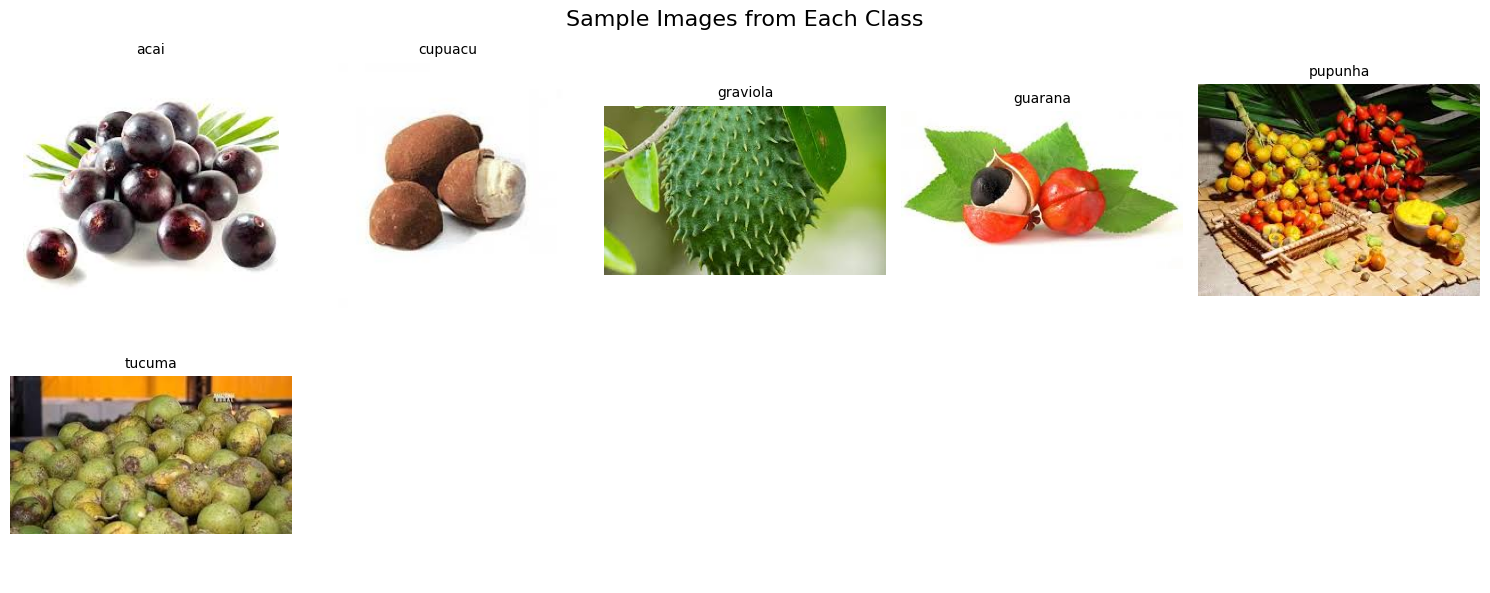

In [2]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

train_dir = "/content/drive/MyDrive/AI and ML/FruitinAmazon/train"

class_names = sorted([d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))])

if not class_names:
    raise ValueError("No class directories found in the train folder. Check dataset path!")

selected_images = []
selected_labels = []

for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    image_files = [f for f in os.listdir(class_path) if f.endswith(('png', 'jpg', 'jpeg'))]

    if image_files:
        random_image = random.choice(image_files)
        selected_images.append(os.path.join(class_path, random_image))
        selected_labels.append(class_name)

num_classes = len(selected_images)
if num_classes == 0:
    raise ValueError("No images found in any class folder. Please check dataset.")

cols = min(5, num_classes)
rows = (num_classes // cols) + (num_classes % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(15, 6))
fig.suptitle("Sample Images from Each Class", fontsize=16)

for i, ax in enumerate(axes.flat):
    if i < num_classes:
        img = mpimg.imread(selected_images[i])
        ax.imshow(img)
        ax.set_title(selected_labels[i], fontsize=10)
        ax.axis("off")
    else:
        ax.axis("off")

plt.tight_layout()
plt.show()


What did you Observe?

Each image represents a different class, confirming correct dataset structure.
Images vary in resolution, lighting, and orientation.
Some classes may have fewer images, indicating dataset imbalance.
Preprocessing (resizing, normalization) may be needed for consistency.

In [3]:
import os
from PIL import Image
train_dir = "/content/drive/MyDrive/AI and ML/FruitinAmazon/train"

corrupted_images = []

for class_name in sorted(os.listdir(train_dir)):
    class_path = os.path.join(train_dir, class_name)

    if os.path.isdir(class_path):
        for image_name in os.listdir(class_path):
            image_path = os.path.join(class_path, image_name)

            try:

                with Image.open(image_path) as img:
                    img.verify()
            except (IOError, SyntaxError):

                corrupted_images.append(image_path)
                os.remove(image_path)
                print(f"Removed corrupted image: {image_path}")

if not corrupted_images:
    print("No Corrupted Images Found.")


No Corrupted Images Found.


In [4]:
import tensorflow as tf

img_height = 128
img_width = 128
batch_size = 32
validation_split = 0.2

rescale = tf.keras.layers.Rescaling(1./255)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=True,
    validation_split=validation_split,
    subset='training',
    seed=123
)

train_ds = train_ds.map(lambda x, y: (rescale(x), y))

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    interpolation='nearest',
    batch_size=batch_size,
    shuffle=False,
    validation_split=validation_split,
    subset='validation',
    seed=123
)

val_ds = val_ds.map(lambda x, y: (rescale(x), y))


Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2), strides=2))
model.add(layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu'))
model.add(layers.MaxPooling2D((2, 2), strides=2))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(
    optimizer='nadam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [7]:
import tensorflow as tf

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        'Sirish Tandukar.h5',
        monitor='val_loss',
        save_best_only=True,
        mode='min',
        verbose=1
    ),
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True,
        verbose=1
    )
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=250,
    batch_size=16,
    callbacks=callbacks
)


Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 650ms/step - accuracy: 0.1406 - loss: 1.8761
Epoch 1: val_loss improved from inf to 1.26549, saving model to Sirish Tandukar.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.1367 - loss: 1.8907 - val_accuracy: 0.8333 - val_loss: 1.2655
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step - accuracy: 0.1476 - loss: 1.9038
Epoch 2: val_loss did not improve from 1.26549
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 493ms/step - accuracy: 0.1628 - loss: 1.8852 - val_accuracy: 0.7778 - val_loss: 1.3091
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step - accuracy: 0.2992 - loss: 1.5896
Epoch 3: val_loss did not improve from 1.26549
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 587ms/step - accuracy: 0.3043 - loss: 1.5831 - val_accuracy: 0.0000e+00 - val_loss: 2.4334
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step - accuracy: 0.2367 - loss: 1.8062
Epoch 4: val_loss improved from 1.26549 to 1.23857, saving model to Sirish Tandukar.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 599ms/step - accuracy: 0.2574 - loss: 1.7777 - val_accuracy: 0.6667 - val_loss: 1.2386
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step - accuracy: 0.4734 - loss: 1.2530
Epoch 5: val_loss improved from 1.23857 to 0.90074, saving model to Sirish Tandukar.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 597ms/step - accuracy: 0.4835 - loss: 1.2444 - val_accuracy: 0.7778 - val_loss: 0.9007
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 653ms/step - accuracy: 0.6238 - loss: 1.1001
Epoch 6: val_loss did not improve from 0.90074
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 831ms/step - accuracy: 0.6311 - loss: 1.0876 - val_accuracy: 0.6667 - val_loss: 1.2091
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 0.9404 - loss: 0.7265
Epoch 7: val_loss did not improve from 0.90074
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 530ms/step - accuracy: 0.9379 - loss: 0.7297 - val_accuracy: 0.5000 - val_loss: 1.6599
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step - accuracy: 0.6956 - loss: 0.9420
Epoch 8: val_loss improved from 0.90074 to 0.67516, saving model to Sirish Tandukar.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 593ms/step - accuracy: 0.6918 - loss: 0.9389 - val_accuracy: 0.7778 - val_loss: 0.6752
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step - accuracy: 0.9005 - loss: 0.4497
Epoch 9: val_loss did not improve from 0.67516
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 539ms/step - accuracy: 0.8976 - loss: 0.4520 - val_accuracy: 0.6667 - val_loss: 0.9575
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step - accuracy: 0.9091 - loss: 0.3710
Epoch 10: val_loss did not improve from 0.67516
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 462ms/step - accuracy: 0.9145 - loss: 0.3648 - val_accuracy: 0.6667 - val_loss: 0.8519
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 631ms/step - accuracy: 0.9497 - loss: 0.1971
Epoch 11: val_loss improved from 0.67516 to 0.50629, saving model to Sirish Tandukar.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 880ms/step - accuracy: 0.9518 - loss: 0.1924 - val_accuracy: 0.8333 - val_loss: 0.5063
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 0.9797 - loss: 0.1200
Epoch 12: val_loss did not improve from 0.50629
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 534ms/step - accuracy: 0.9813 - loss: 0.1167 - val_accuracy: 0.8333 - val_loss: 0.5252
Epoch 13/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step - accuracy: 1.0000 - loss: 0.0557
Epoch 13: val_loss did not improve from 0.50629
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 478ms/step - accuracy: 1.0000 - loss: 0.0545 - val_accuracy: 0.7778 - val_loss: 0.5616
Epoch 14/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 1.0000 - loss: 0.0285
Epoch 14: val_loss did not improve from 0.50629
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 534ms/step - accuracy: 1.0000 - loss: 0.0284 - val_accuracy: 0.7778 - val_loss: 0.5725
Epoch 15/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step - accuracy: 1.0000 - loss: 0.0186
Epoch 15: val_loss did not improve from 0.50629
3/3 

In [8]:
test_dir = '/content/drive/MyDrive/AI and ML/FruitinAmazon/test'

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False
)

test_loss, test_acc = model.evaluate(test_ds)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")


Found 30 files belonging to 6 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.7000 - loss: 104.4593
Test Loss: 104.45930480957031
Test Accuracy: 0.699999988079071


In [9]:

model.save('sirish_tandukar_model.h5')
print("Model saved successfully!")


Model saved successfully!


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.40      0.80      0.53         5
           2       0.80      0.80      0.80         5
           3       1.00      0.60      0.75         5
           4       0.50      0.20      0.29         5
           5       0.33      0.40      0.36         5

    accuracy                           0.57        30
   macro avg       0.63      0.57      0.57        30
weighted avg       0.63      0.57      0.57        30

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step - accuracy: 1.0000 - loss: 0.0846
Epoch 1: val_loss did not improve from 0.40392
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 566ms/step - accuracy: 1.0000 - loss: 0.0829 - val_accuracy: 0.7778 - val_loss: 0.4763
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 1.0000 - loss: 0.0510
Epoch 2: val_loss did not improve from 0.40392
3/3 ━━━━━━━━━━━━

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 552ms/step - accuracy: 1.0000 - loss: 0.0440 - val_accuracy: 0.8889 - val_loss: 0.3806
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 608ms/step - accuracy: 1.0000 - loss: 0.0246
Epoch 4: val_loss did not improve from 0.38061
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 790ms/step - accuracy: 1.0000 - loss: 0.0251 - val_accuracy: 0.7778 - val_loss: 0.4480
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 582ms/step - accuracy: 1.0000 - loss: 0.0141
Epoch 5: val_loss did not improve from 0.38061
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 730ms/step - accuracy: 1.0000 - loss: 0.0141 - val_accuracy: 0.7778 - val_loss: 0.5116
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step - accuracy: 1.0000 - loss: 0.0089
Epoch 6: val_loss did not improve from 0.38061
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 538ms/step - accuracy: 1.0000 - loss: 0.0088 - val_accuracy: 0.7778 - val_loss: 0.5410
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step - accuracy: 1.0000 - loss: 0.0054
Epoch 7: val_loss did not improve from 0.38061
3/3 ━━━━━━━━

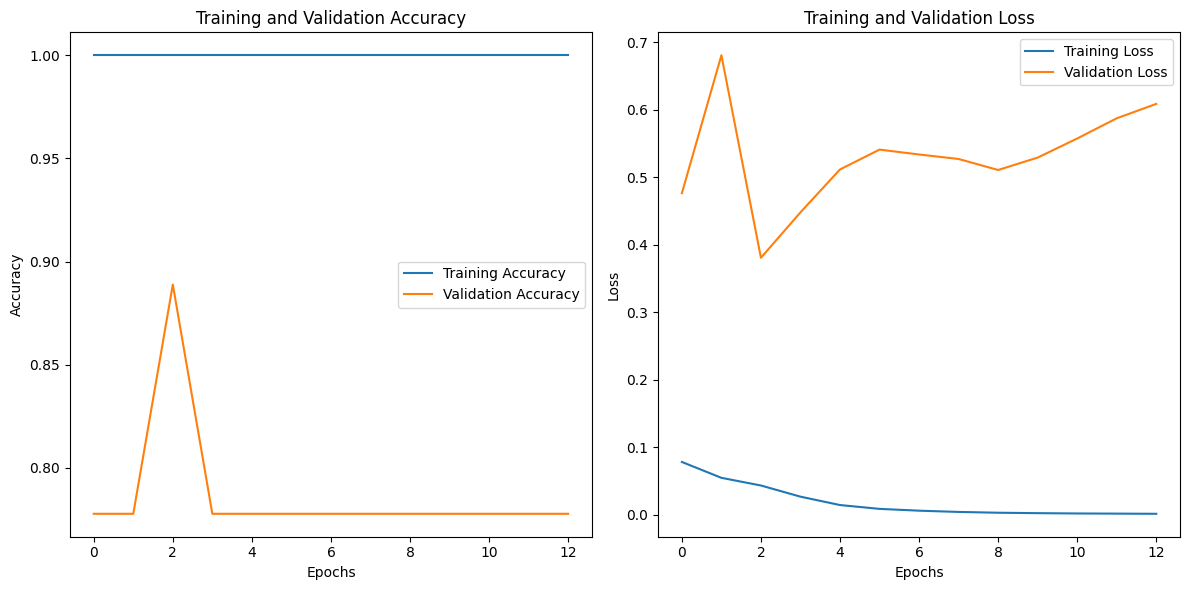

Model saved as 'sirish_tandukar_model.h5'


In [11]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

test_images, test_labels = [], []

for images, labels in test_ds:
    test_images.append(images)
    test_labels.append(labels)

test_images = np.concatenate(test_images, axis=0)
test_labels = np.concatenate(test_labels, axis=0)

predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

print("Classification Report:")
print(classification_report(test_labels, predicted_labels))

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=250,
    batch_size=16,
    callbacks=callbacks
)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

model.save('sirish_tanndukar_model.h5')
print("Model saved as 'sirish_tandukar_model.h5'")
